In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns


#Importing Csv file: Training and Testing data 

In [3]:
df_train =  pd.read_csv("Training.csv")
df_test =  pd.read_csv("Testing.csv")
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
#Getting information about the data

In [7]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [8]:
df_train.columns[0:100]

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
       'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety',
       'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness',
       'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure',
 

In [9]:
df_train["prognosis"].unique()


array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [10]:
#Checking for Null values

In [11]:
null_values =df_train.columns[df_train.isnull().any()]
df_train[null_values].isnull().sum()

Unnamed: 133    4920
dtype: int64

In [12]:
#Dropping Column Unnamed

In [13]:
df_train.drop('Unnamed: 133', axis=1, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [14]:
#Checking for Null values for Testing Dataset

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.7+ KB


In [16]:
null_columns=df_test.columns[df_test.isnull().any()]
df_test[null_columns].isnull().sum()

Series([], dtype: float64)

In [17]:
#Visualizing Data

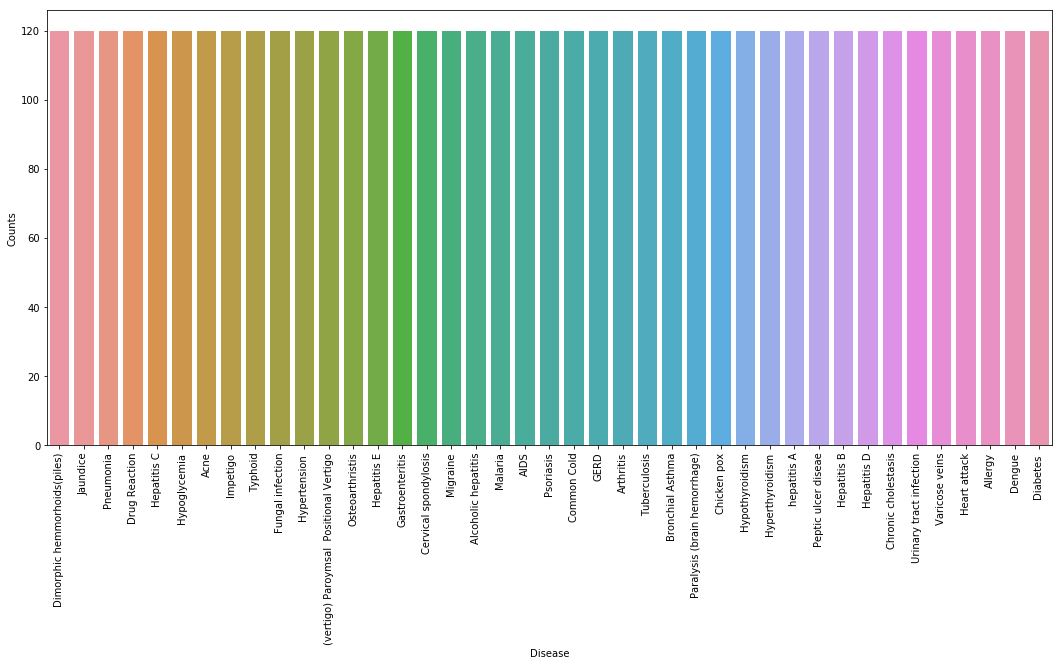

In [18]:
count_of_Disease = df_train["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": count_of_Disease.index,
    "Counts": count_of_Disease.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

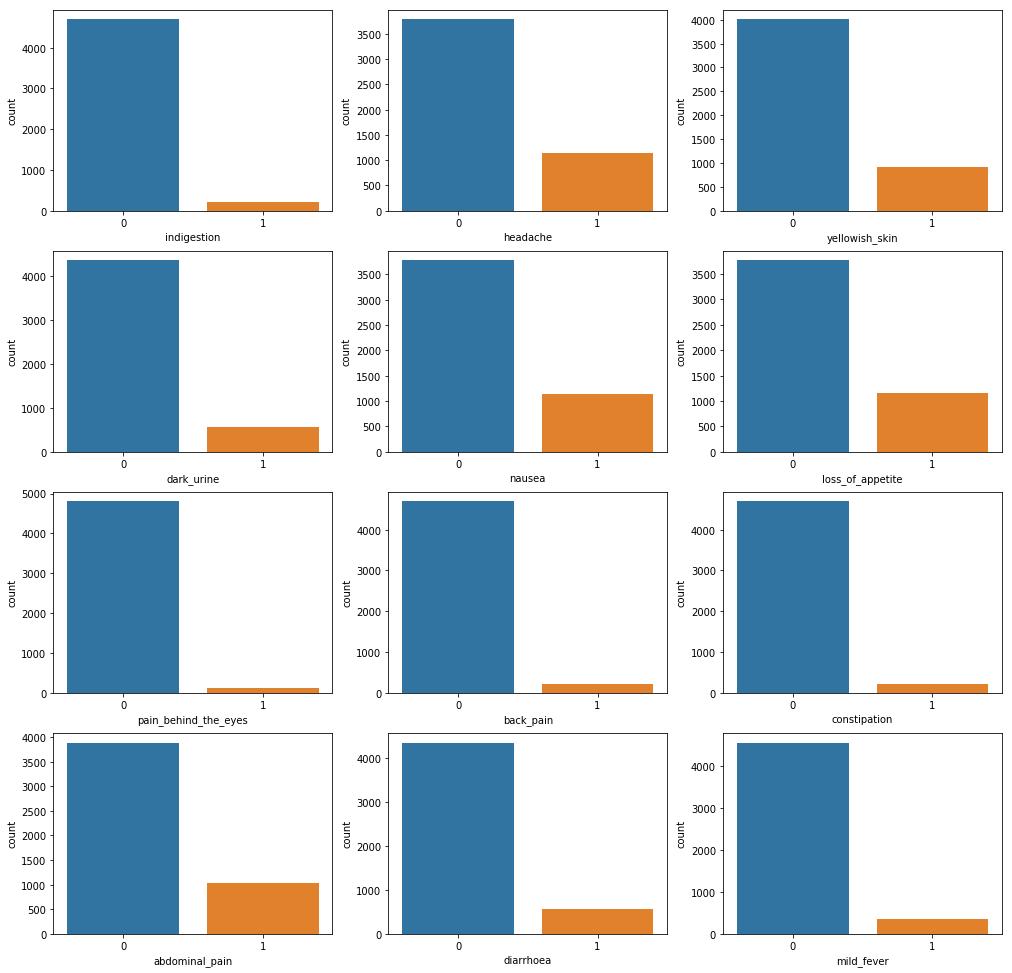

In [19]:
features = ['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever']


plt.figure(figsize = (17,17))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    sns.countplot(x = feature, data = df_train)
    plt.xlabel(feature)
plt.show()

In [ ]:
#Trying to learn about various symptoms and their prognosis to see which symptoms is a very telling sign

In [20]:
data = {'Symptoms': [], 'Prognosis': [], 'length': []}
table = pd.DataFrame(data)
table = table.astype({"Symptoms": str, "Prognosis": object, 'length': int})
i = 0

for symp in sorted(df_train.columns.tolist()[:-1]):
    prognosis = df_train[df_train[symp] == 1].prognosis.unique().tolist()
    table = table.append({'Symptoms': symp}, {'Prognosis': prognosis}, {'length':len(prognosis)}) 
    table.at[i,'Prognosis'] = prognosis
    table.at[i, 'length'] = len(prognosis)
    i += 1
    
table.sort_values(by='length', ascending=False).head(10)


,Symptoms,Prognosis,length
41,fatigue,"[Diabetes , Bronchial Asthma, Jaundice, Chicke...",17.0
122,vomiting,"[GERD, Chronic cholestasis, Peptic ulcer disea...",17.0
46,high_fever,"[AIDS, Bronchial Asthma, Jaundice, Malaria, Ch...",12.0
72,nausea,"[Chronic cholestasis, Malaria, Dengue, Typhoid...",10.0
61,loss_of_appetite,"[Chronic cholestasis, Peptic ulcer diseae, Chi...",10.0
45,headache,"[Hypertension , Migraine, Paralysis (brain hem...",10.0
0,abdominal_pain,"[Chronic cholestasis, Peptic ulcer diseae, Jau...",9.0
131,yellowish_skin,"[Chronic cholestasis, Jaundice, hepatitis A, H...",8.0
130,yellowing_of_eyes,"[Chronic cholestasis, hepatitis A, Hepatitis B...",7.0
101,skin_rash,"[Fungal infection, Drug Reaction, Chicken pox,...",7.0


In [21]:
#Fatigue and Vomitting are most common symptons and mostly wont be correct predictors for prognosis

In [22]:
table.sort_values(by='length', ascending=True).head(10)

,Symptoms,Prognosis,length
42,fluid_overload,[],0.0
126,weight_gain,[Hypothyroidism],1.0
87,pus_filled_pimples,[Acne],1.0
86,puffy_face_and_eyes,[Hypothyroidism],1.0
85,prominent_veins_on_calf,[Varicose veins],1.0
84,polyuria,[Diabetes ],1.0
82,patches_in_throat,[AIDS],1.0
81,passage_of_gases,[Peptic ulcer diseae],1.0
80,palpitations,[Hypoglycemia],1.0
78,pain_in_anal_region,[Dimorphic hemmorhoids(piles)],1.0


In [ ]:
#Trying to find out linear Relationship between features to gather informatio about if any of the two symptoms occur together

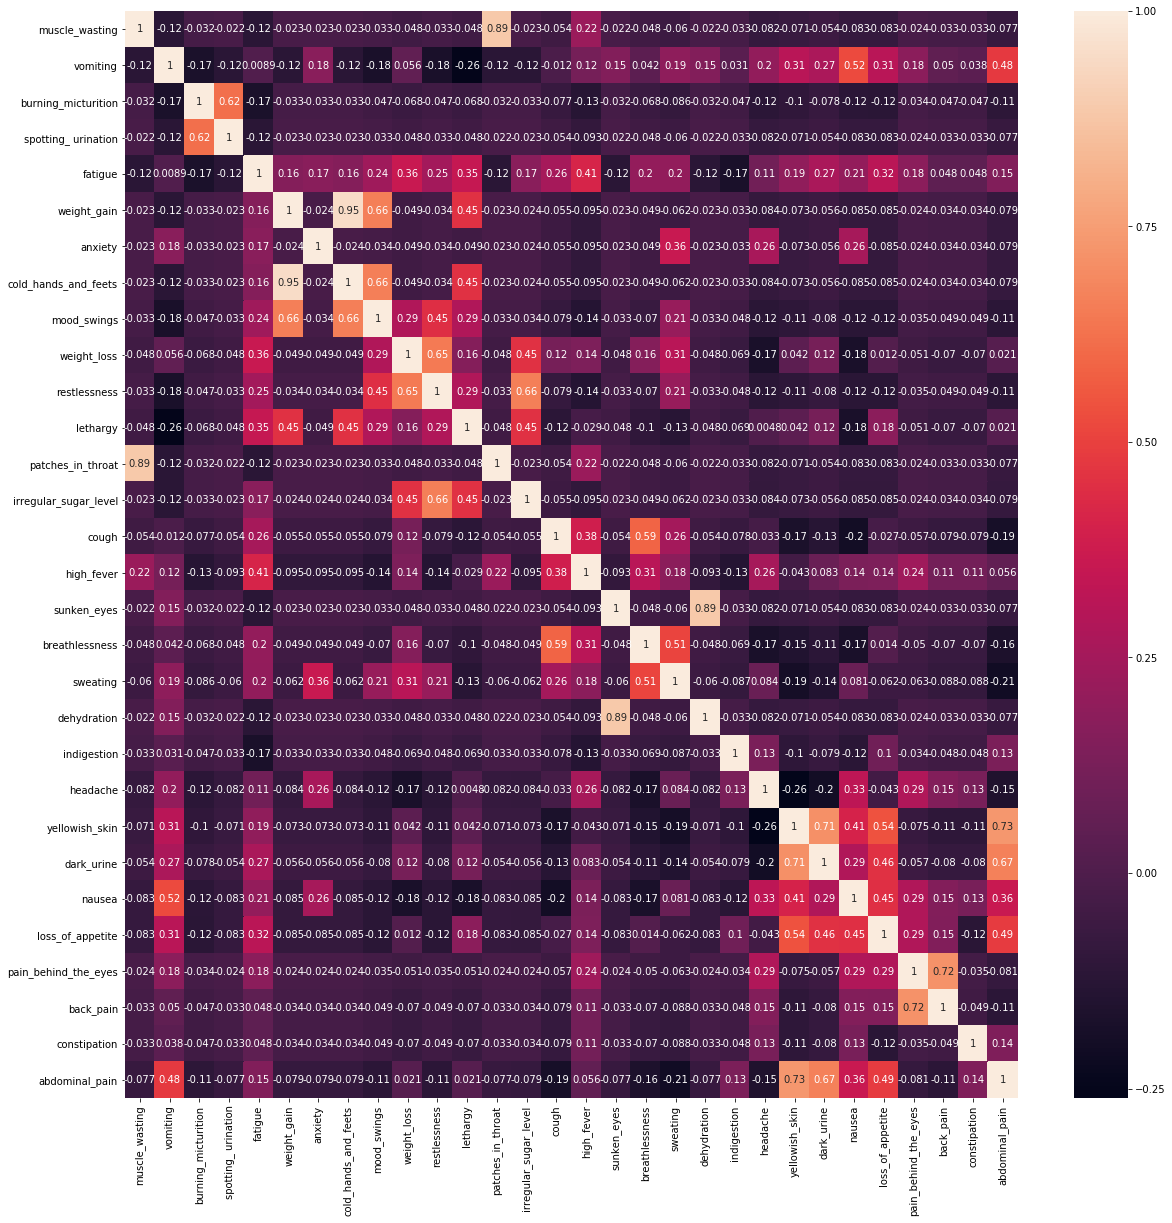

In [23]:
df_correlation = df_train.iloc[:, 10:40]
plt.figure(figsize = (20, 20))
sns.heatmap(df_correlation.corr(), annot = True)
plt.show()

In [26]:
# 1. DECISION TREE

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
#Splitting dataset

In [29]:
x_train, y_train = df_train.loc[:,df_train.columns != "prognosis"], df_train.loc[:,"prognosis"]
x_test, y_test = df_test.loc[:,df_train.columns != "prognosis"], df_test.loc[:,"prognosis"]

In [30]:
dt = DecisionTreeClassifier(random_state = 42)
clf=dt.fit(x_train, y_train)


In [31]:
y_pred = dt.predict(x_test)
dt.score(x_test, y_test)
y_pred = dt.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result: ")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_train, pred)}n")
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result: ")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_test, pred)}n")

Train Result: 
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:n           (vertigo) Paroymsal  Positional Vertigo   AIDS   Acne  \
f1-score                                       1.0    1.0    1.0   
precision                                      1.0    1.0    1.0   
recall                                         1.0    1.0    1.0   
support                                      120.0  120.0  120.0   

           Alcoholic hepatitis  Allergy  Arthritis  Bronchial Asthma  \
f1-score                   1.0      1.0        1.0               1.0   
precision                  1.0      1.0        1.0               1.0   
recall                     1.0      1.0        1.0               1.0   
support                  120.0    120.0      120.0             120.0   

           Cervical spondylosis  Chicken pox  Chronic cholestasis  \
f1-score                    1.0          1.0                  1.0   
precision                   1.0          1.0      

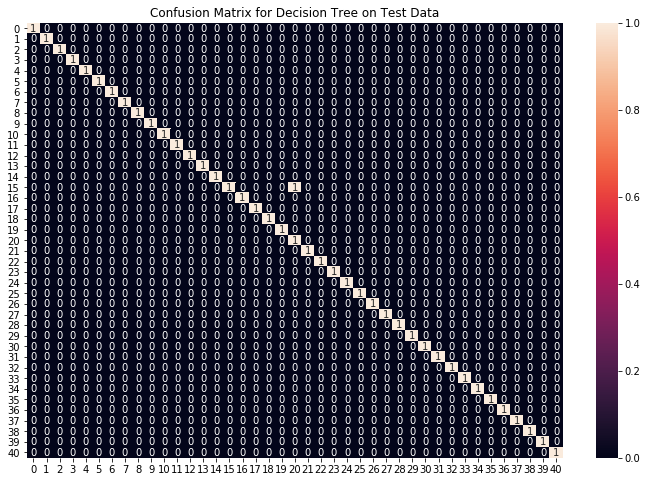

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Decision Tree on Test Data")
plt.show()

# 2.Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier


In [38]:

random = RandomForestClassifier(random_state = 42, n_estimators = 100)
clf=random.fit(x_train, y_train)
y_random= random.predict(x_test)


In [39]:
print_score(random, x_train, y_train, x_test, y_test, train=True)
print_score(random, x_train, y_train, x_test, y_test, train=False)

Train Result: 
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:n           (vertigo) Paroymsal  Positional Vertigo   AIDS   Acne  \
f1-score                                       1.0    1.0    1.0   
precision                                      1.0    1.0    1.0   
recall                                         1.0    1.0    1.0   
support                                      120.0  120.0  120.0   

           Alcoholic hepatitis  Allergy  Arthritis  Bronchial Asthma  \
f1-score                   1.0      1.0        1.0               1.0   
precision                  1.0      1.0        1.0               1.0   
recall                     1.0      1.0        1.0               1.0   
support                  120.0    120.0      120.0             120.0   

           Cervical spondylosis  Chicken pox  Chronic cholestasis  \
f1-score                    1.0          1.0                  1.0   
precision                   1.0          1.0      

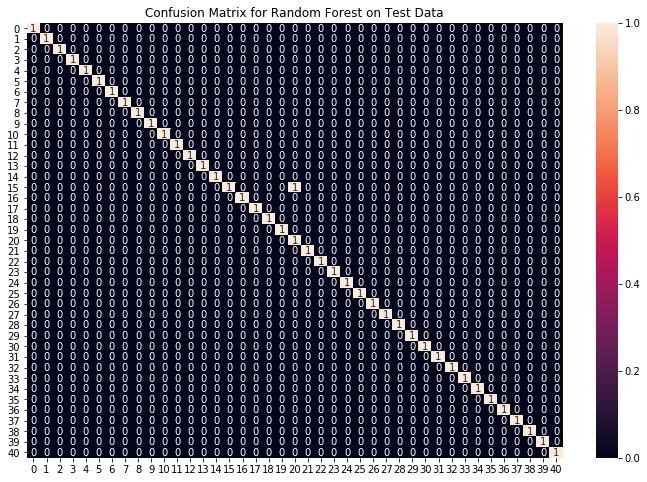

In [40]:
cf_matrix_random = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest on Test Data")
plt.show()

In [41]:
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

# 3.Support Vector Machine

In [42]:
#Kernel: linear

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result: ")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_train, pred)}n")
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result: ")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_test, pred)}n")

In [44]:
from sklearn.svm import LinearSVC
model_linear = LinearSVC(loss='hinge', dual=True)
model_linear.fit(x_train,y_train)
y_predict =model_linear.predict(x_test)

print_score(model_linear, x_train, y_train, x_test, y_test, train=True)
print_score(model_linear, x_train, y_train, x_test, y_test, train=False)


Train Result: 
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:n           (vertigo) Paroymsal  Positional Vertigo   AIDS   Acne  \
f1-score                                       1.0    1.0    1.0   
precision                                      1.0    1.0    1.0   
recall                                         1.0    1.0    1.0   
support                                      120.0  120.0  120.0   

           Alcoholic hepatitis  Allergy  Arthritis  Bronchial Asthma  \
f1-score                   1.0      1.0        1.0               1.0   
precision                  1.0      1.0        1.0               1.0   
recall                     1.0      1.0        1.0               1.0   
support                  120.0    120.0      120.0             120.0   

           Cervical spondylosis  Chicken pox  Chronic cholestasis  \
f1-score                    1.0          1.0                  1.0   
precision                   1.0          1.0      

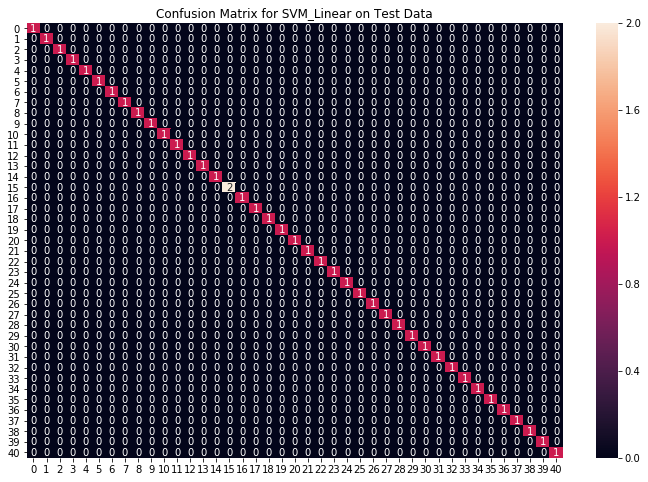

In [46]:
matrix_randomlinear = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(12,8))
sns.heatmap(matrix_randomlinear, annot=True)
plt.title("Confusion Matrix for SVM_Linear on Test Data")
plt.show()

In [47]:
#Kenel: Poly

In [48]:
from sklearn.svm import SVC
# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials
model_poly = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model_poly.fit(x_train, y_train)
y_predit =model_poly.predict(x_test)

print_score(model_poly, x_train, y_train, x_test, y_test, train=True)
print_score(model_poly, x_train, y_train, x_test, y_test, train=False)

Train Result: 
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:n           (vertigo) Paroymsal  Positional Vertigo   AIDS   Acne  \
f1-score                                       1.0    1.0    1.0   
precision                                      1.0    1.0    1.0   
recall                                         1.0    1.0    1.0   
support                                      120.0  120.0  120.0   

           Alcoholic hepatitis  Allergy  Arthritis  Bronchial Asthma  \
f1-score                   1.0      1.0        1.0               1.0   
precision                  1.0      1.0        1.0               1.0   
recall                     1.0      1.0        1.0               1.0   
support                  120.0    120.0      120.0             120.0   

           Cervical spondylosis  Chicken pox  Chronic cholestasis  \
f1-score                    1.0          1.0                  1.0   
precision                   1.0          1.0      

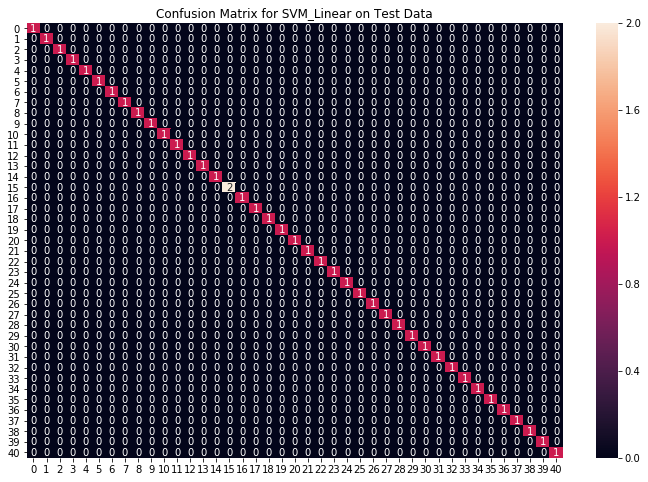

In [49]:
matrix_randompoly = confusion_matrix(y_test, y_predit)
plt.figure(figsize=(12,8))
sns.heatmap(matrix_randompoly, annot=True)
plt.title("Confusion Matrix for SVM_Linear on Test Data")
plt.show()

In [50]:
#Kernel: RBF

In [51]:
model_rbf = SVC(kernel='rbf', gamma="auto")
clf=model_rbf.fit(x_train, y_train)
y_predict =model_rbf.predict(x_test)

print_score(model_rbf, x_train, y_train, x_test, y_test, train=True)
print_score(model_rbf, x_train, y_train, x_test, y_test, train=False)


Train Result: 
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:n           (vertigo) Paroymsal  Positional Vertigo   AIDS   Acne  \
f1-score                                       1.0    1.0    1.0   
precision                                      1.0    1.0    1.0   
recall                                         1.0    1.0    1.0   
support                                      120.0  120.0  120.0   

           Alcoholic hepatitis  Allergy  Arthritis  Bronchial Asthma  \
f1-score                   1.0      1.0        1.0               1.0   
precision                  1.0      1.0        1.0               1.0   
recall                     1.0      1.0        1.0               1.0   
support                  120.0    120.0      120.0             120.0   

           Cervical spondylosis  Chicken pox  Chronic cholestasis  \
f1-score                    1.0          1.0                  1.0   
precision                   1.0          1.0      

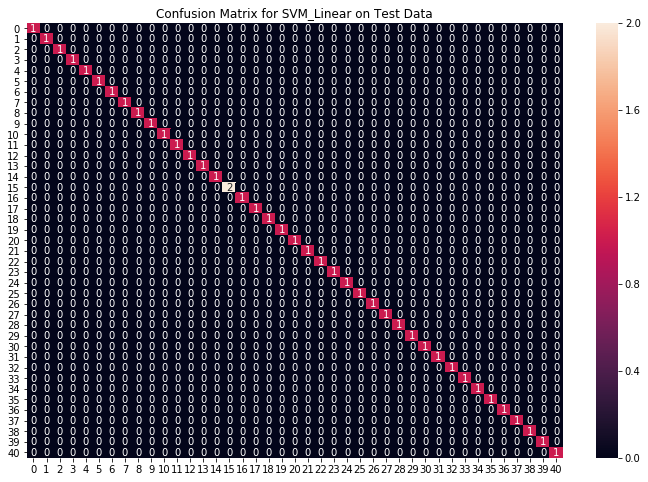

In [52]:
matrix_randomrbf = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(12,8))
sns.heatmap(matrix_randomrbf, annot=True)
plt.title("Confusion Matrix for SVM_Linear on Test Data")
plt.show()

# 4.LOGISTIC REGRESSION

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
clf=logreg.fit(x_train, y_train)
y_predlog=logreg.predict(x_test)
logreg.score(x_test, y_test)*100

100.0

In [54]:
print_score(logreg, x_train, y_train, x_test, y_test, train=True)
print_score(logreg, x_train, y_train, x_test, y_test, train=False)


Train Result: 
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:n           (vertigo) Paroymsal  Positional Vertigo   AIDS   Acne  \
f1-score                                       1.0    1.0    1.0   
precision                                      1.0    1.0    1.0   
recall                                         1.0    1.0    1.0   
support                                      120.0  120.0  120.0   

           Alcoholic hepatitis  Allergy  Arthritis  Bronchial Asthma  \
f1-score                   1.0      1.0        1.0               1.0   
precision                  1.0      1.0        1.0               1.0   
recall                     1.0      1.0        1.0               1.0   
support                  120.0    120.0      120.0             120.0   

           Cervical spondylosis  Chicken pox  Chronic cholestasis  \
f1-score                    1.0          1.0                  1.0   
precision                   1.0          1.0      

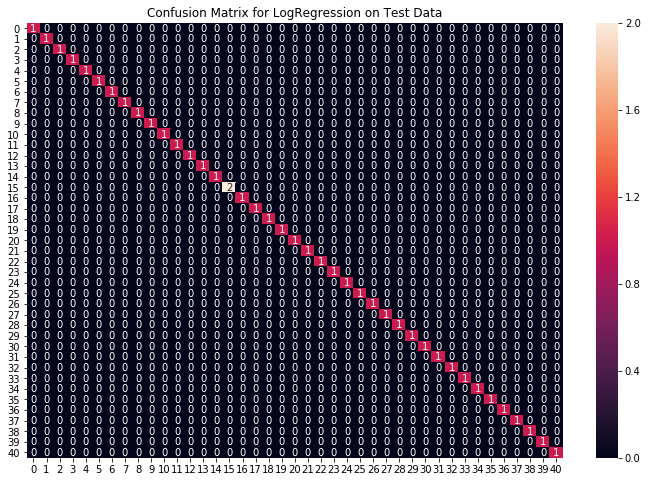

In [55]:
matrix_log = confusion_matrix(y_test, y_predlog)
plt.figure(figsize=(12,8))
sns.heatmap(matrix_log, annot=True)
plt.title("Confusion Matrix for LogRegression on Test Data")
plt.show()

# 5. K-Nearest Neighbor

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # k = 5
x_train, y_train = df_train.loc[:,df_train.columns != "prognosis"], df_train.loc[:,"prognosis"]
x_test, y_test = df_test.loc[:,df_train.columns != "prognosis"], df_test.loc[:,"prognosis"]
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Prediction list: {}".format(prediction[0:20]))
print("With KNN (K=5) accuracy is: ",knn.score(x_test, y_test)*100)

Prediction list: ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A']
With KNN (K=5) accuracy is:  100.0


In [57]:
neighbors = np.arange(1,25)   # for k tuning
train_accuracy = []
test_accuracy = []
# Loop for different k values
for i, k in enumerate(neighbors):
    # k from 1 to 25 (excluded)
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit the knn
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

In [58]:
# Plotting the accuracies


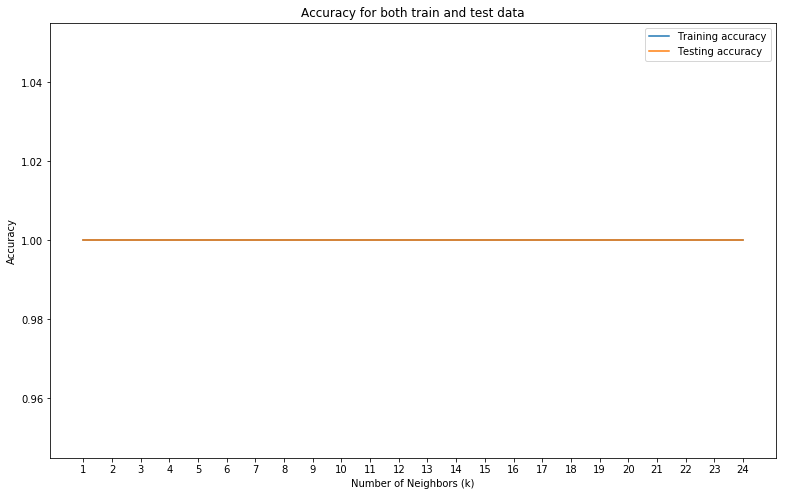

In [59]:
plt.figure(figsize = (13,8))
plt.plot(neighbors, train_accuracy, label = "Training accuracy")
plt.plot(neighbors, test_accuracy, label = "Testing accuracy")
plt.legend()
plt.title("Accuracy for both train and test data")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.show()

In [63]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
clf=knn.fit(x_train, y_train)
k = 5 # for K-fold cross validation
cv_result = cross_val_score(knn, x_train, y_train, cv = k) 
print("Cross Validation scores: ", cv_result)
print("Cross Validation scores average: ", np.sum(cv_result)/len(cv_result))

Cross Validation scores:  [1. 1. 1. 1. 1.]
Cross Validation scores average:  1.0


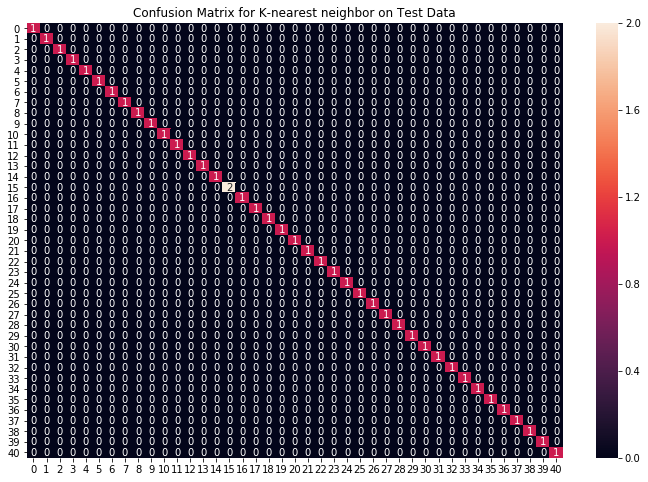

In [64]:
k_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(12,8))
sns.heatmap(k_matrix, annot=True)
plt.title("Confusion Matrix for K-nearest neighbor on Test Data")
plt.show()

In [65]:
print_score(knn, x_train, y_train, x_test, y_test, train=True)
print_score(knn, x_train, y_train, x_test, y_test, train=False)


Train Result: 
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:n           (vertigo) Paroymsal  Positional Vertigo   AIDS   Acne  \
f1-score                                       1.0    1.0    1.0   
precision                                      1.0    1.0    1.0   
recall                                         1.0    1.0    1.0   
support                                      120.0  120.0  120.0   

           Alcoholic hepatitis  Allergy  Arthritis  Bronchial Asthma  \
f1-score                   1.0      1.0        1.0               1.0   
precision                  1.0      1.0        1.0               1.0   
recall                     1.0      1.0        1.0               1.0   
support                  120.0    120.0      120.0             120.0   

           Cervical spondylosis  Chicken pox  Chronic cholestasis  \
f1-score                    1.0          1.0                  1.0   
precision                   1.0          1.0      